### A Decade of US Trade Deficit: YTD Comparison from October 2013 to 2023"

In [1]:
import requests
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from dotenv import load_dotenv
import os
load_dotenv()

True

In [2]:
api_key = os.getenv('CENSUS_API_KEY')

In [3]:
# Get Import and Export data for 2013-2023 October YTD 

base_url = 'https://api.census.gov/data/timeseries/intltrade/'

export_dfs = []
import_dfs = []


for yr in range(2013, 2024):
        
    try:
        exports = requests.get(f'{base_url}exports/porths?get=ALL_VAL_YR&time={yr}-10&key={api_key}')
        df = pd.DataFrame(exports.json())
        export_dfs.append(df.iloc[1:])

        imports = requests.get(f'{base_url}imports/porths?get=GEN_VAL_YR&time={yr}-10&key={api_key}')
        df = pd.DataFrame(imports.json())
        import_dfs.append(df.iloc[1:])

    except: continue
    
exports_df = pd.concat(export_dfs)
imports_df = pd.concat(import_dfs)

display(exports_df.head())
display(imports_df.head())

,0,1
1,1310401091206,2013-10
1,1353429059251,2014-10
1,1262675541595,2015-10
1,1201846097537,2016-10
1,1275350376963,2017-10


,0,1
1,1896906198370,2013-10
1,1969669904087,2014-10
1,1886869870454,2015-10
1,1811912756358,2016-10
1,1931766287169,2017-10


In [4]:
# Set columns
cols = ['value', 'date']
exports_df.columns = cols
imports_df.columns = cols

display(exports_df.tail())
display(imports_df.tail())

,value,date
1,1373347658085,2019-10
1,1170132185391,2020-10
1,1441956464091,2021-10
1,1726121740253,2022-10
1,1685641685930,2023-10


,value,date
1,2090847658517,2019-10
1,1904147115684,2020-10
1,2312367548006,2021-10
1,2733732286484,2022-10
1,2580671322262,2023-10


In [5]:
# Merge DataFrames on 'date'
merged_df = pd.merge(exports_df, imports_df, on='date', suffixes=('_exports', '_imports'))


# Convert date to datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Cast to float
merged_df['exports'] = merged_df['value_exports'].astype(float)
merged_df['imports'] = merged_df['value_imports'].astype(float)
merged_df.drop(columns=['value_exports', 'value_imports'], inplace=True)

merged_df.head()

,date,exports,imports
0,2013-10-01,1.310401e+12,1.896906e+12
1,2014-10-01,1.353429e+12,1.969670e+12
2,2015-10-01,1.262676e+12,1.886870e+12
3,2016-10-01,1.201846e+12,1.811913e+12
4,2017-10-01,1.275350e+12,1.931766e+12


In [6]:
# Calculate deficit
merged_df['deficit'] = abs(merged_df['imports'] - merged_df['exports'])

merged_df.head()

,date,exports,imports,deficit
0,2013-10-01,1.310401e+12,1.896906e+12,5.865051e+11
1,2014-10-01,1.353429e+12,1.969670e+12,6.162408e+11
2,2015-10-01,1.262676e+12,1.886870e+12,6.241943e+11
3,2016-10-01,1.201846e+12,1.811913e+12,6.100667e+11
4,2017-10-01,1.275350e+12,1.931766e+12,6.564159e+11


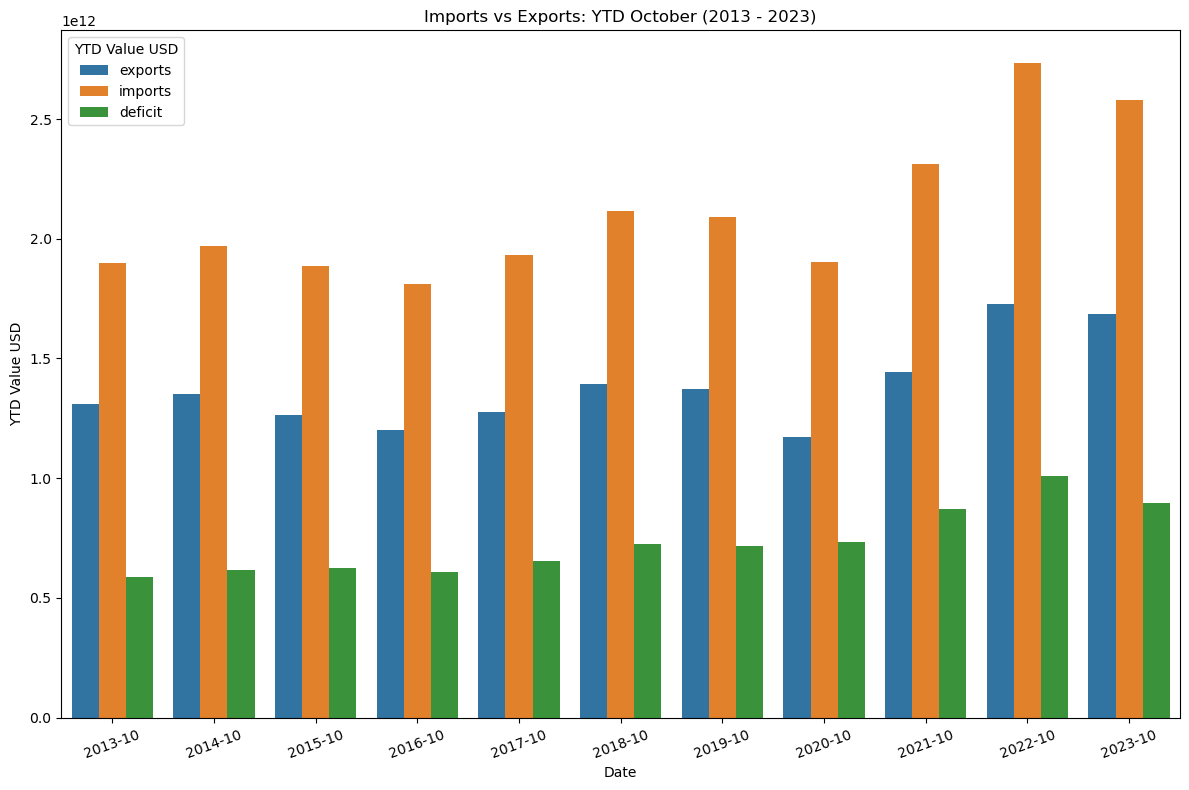

In [7]:
# Melt the DataFrame to long format for Seaborn plotting
df_melted = merged_df.melt(id_vars='date', var_name='Transaction Type', value_name='YTD Value (USD)')
df_melted['date'] = df_melted['date'].dt.to_period('M')

# Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_melted, 
    x='date', 
    y='YTD Value (USD)', 
    hue='Transaction Type'
)
plt.xlabel('Date')
plt.ylabel('YTD Value USD')
plt.title('Imports vs Exports: YTD October (2013 - 2023)')
plt.legend(title='YTD Value USD')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

In [8]:
# Convert the USD total to billions
def format_dollar(n):
    scales = ['', 'thousand', 'million', 'billion', 'trillion', 'quadrillion', 'quintillion']

    scale_index = 0
    while abs(n) >= 1000 and scale_index < len(scales) - 1:
        n /= 1000.0
        scale_index += 1

    return f"${n:.2f} {scales[scale_index]}"

In [9]:
deficits = merged_df['deficit'].tolist()
deficits_formatted = list(map(lambda n: format_dollar(n), deficits))

deficits_formatted

['$586.51 billion',
 '$616.24 billion',
 '$624.19 billion',
 '$610.07 billion',
 '$656.42 billion',
 '$723.50 billion',
 '$717.50 billion',
 '$734.01 billion',
 '$870.41 billion',
 '$1.01 trillion',
 '$895.03 billion']